<h1 style="color:orang; text-align:left;"> Unveiling Mushroom Mysteries:  </h1>

<h2 style="font-size: 25px ;color:red; text-align:left;">   Entropy of the Data (Q1) </h2>

In [38]:
import pandas as pd
from scipy.stats import entropy

# Load the dataset
df = pd.read_csv("mushrooms.csv")  # Update the path if needed

# Extract the target column (class) and calculate entropy
class_counts = df['class'].value_counts(normalize=True)
data_entropy = entropy(class_counts, base=2)

print("Entropy of the dataset:", data_entropy)


Entropy of the dataset: 0.9990678968724604


<h2 style="font-size: 25px ;color:red; text-align:left;">   Calculating Information Gain for Cap-Color (Q2) </h2>

In [39]:
import pandas as pd
from scipy.stats import entropy

# Load the dataset
df = pd.read_csv("mushrooms.csv")  # Update path if needed

# Function to calculate entropy for a given column
def calculate_entropy(column):
    value_counts = column.value_counts(normalize=True)
    return entropy(value_counts, base=2)

# Step 1: Compute dataset entropy
H_Y = calculate_entropy(df['class'])

# Step 2: Compute conditional entropy for "cap-color"
cap_color_groups = df.groupby("cap-color")["class"]
conditional_entropy = sum(
    (len(group) / len(df)) * calculate_entropy(group) for _, group in cap_color_groups
)

# Step 3: Compute Information Gain
info_gain = H_Y - conditional_entropy

print("Entropy of dataset (H(Y)):", H_Y)
print("Conditional Entropy (H(Y | Cap-Color)):", conditional_entropy)
print("Information Gain (IG(Y, Cap-Color)):", info_gain)


Entropy of dataset (H(Y)): 0.9990678968724604
Conditional Entropy (H(Y | Cap-Color)): 0.9630186138962566
Information Gain (IG(Y, Cap-Color)): 0.0360492829762038


<h2 style="font-size: 25px ;color:red; text-align:left;">   Next Attribute Selection in Decision Tree After Cap-Color (Q3) </h2>

In [42]:
import pandas as pd
from scipy.stats import entropy

def calculate_entropy(column):
    value_counts = column.value_counts(normalize=True)
    return entropy(value_counts, base=2)

# Load dataset
df = pd.read_csv("mushrooms.csv")  # Update path if needed

# Compute dataset entropy
H_Y = calculate_entropy(df['class'])

# Calculate information gain for all attributes except "class"
info_gains = {}
for column in df.columns:
    if column != "class":
        cap_color_groups = df.groupby(column)["class"]
        conditional_entropy = sum(
            (len(group) / len(df)) * calculate_entropy(group) for _, group in cap_color_groups
        )
        info_gains[column] = H_Y - conditional_entropy

# Sort attributes by information gain
sorted_info_gains = sorted(info_gains.items(), key=lambda x: x[1], reverse=True)

# Display the best attribute after "cap-color"
next_best_attribute = sorted_info_gains[0]
print("Next best attribute:", next_best_attribute)


Next best attribute: ('odor', 0.9060749773839999)


<h2 style="font-size: 25px ;color:red; text-align:left;">   Misclassification rate (Q4) </h2>

In [43]:
# Get proportions of edible and poisonous mushrooms
class_proportions = df['class'].value_counts(normalize=True)
p1 = class_proportions.iloc[0]  # Probability of predicting 'edible'
p2 = class_proportions.iloc[1]  # Probability of predicting 'poisonous'

# Expected misclassification rate
misclassification_rate = 2 * p1 * p2  # Formula: 2 * p1 * p2 for a random classifier

misclassification_rate


0.49935405449893944

<h1 style="font-size: 35px;
    font-weight: bold;color:purple; text-align:left;"> Step2 :  EDA and Classification Algorithms </h1>

<h2 style="font-size: 25px ;color:red; text-align:left;">   Exploratory Data Analysis EDA (Q5) </h2>

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  sta

C:\Users\IHC\AppData\Local\Temp\ipykernel_2956\2196200002.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['class'], palette="Set2")


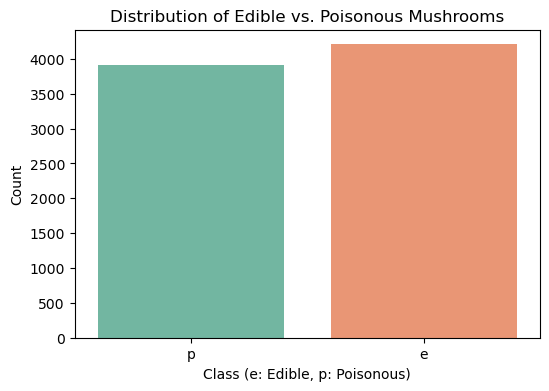

C:\Users\IHC\AppData\Local\Temp\ipykernel_2956\2196200002.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], ax=ax, palette="viridis")
C:\Users\IHC\AppData\Local\Temp\ipykernel_2956\2196200002.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], ax=ax, palette="viridis")
C:\Users\IHC\AppData\Local\Temp\ipykernel_2956\2196200002.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], ax=ax, palette="viridis")
C:\Users\IHC\AppData\Local\Temp\ipykernel_2956\2196200002.py:35: FutureWarning: 

Pas

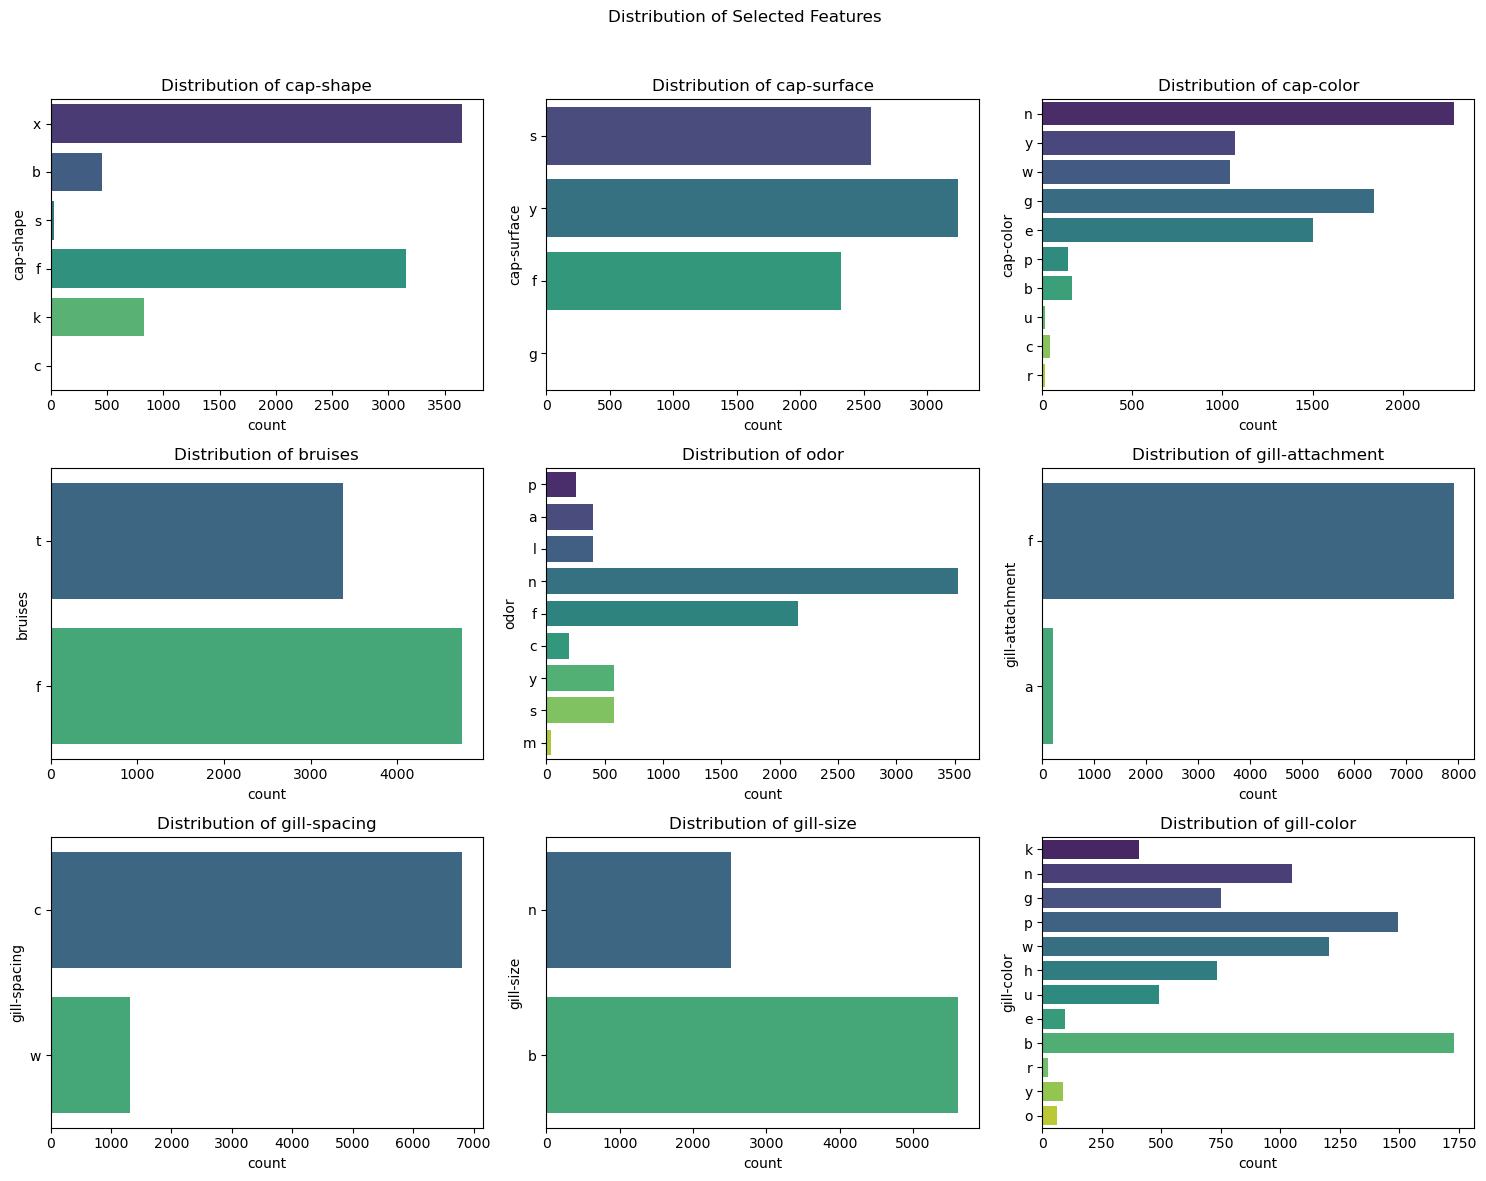

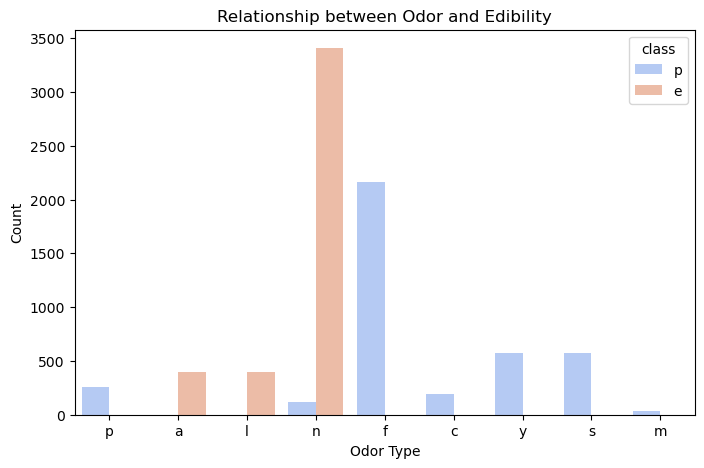

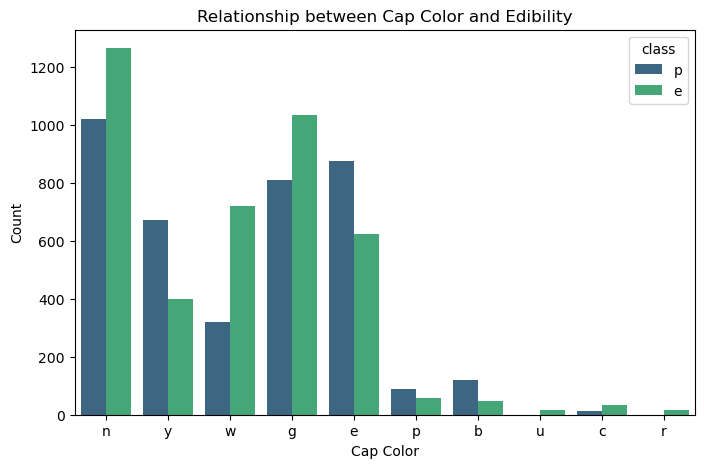

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "mushrooms.csv"  
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:")
df.info()

# Display first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Checking for missing values
print("\nMissing values in dataset:")
print(df.isnull().sum())

# Countplot for the target variable (Edible vs Poisonous)
plt.figure(figsize=(6, 4))
sns.countplot(x=df['class'], palette="Set2")
plt.title("Distribution of Edible vs. Poisonous Mushrooms")
plt.xlabel("Class (e: Edible, p: Poisonous)")
plt.ylabel("Count")
plt.show()

# Visualizing the distribution of key categorical features
selected_features = df.columns[1:10]  # Selecting a few features for visualization
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Distribution of Selected Features")

for ax, feature in zip(axes.flatten(), selected_features):
    sns.countplot(y=df[feature], ax=ax, palette="viridis")
    ax.set_title(f"Distribution of {feature}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Checking the relationship between odor and edibility
plt.figure(figsize=(8, 5))
sns.countplot(x=df['odor'], hue=df['class'], palette="coolwarm")
plt.title("Relationship between Odor and Edibility")
plt.xlabel("Odor Type")
plt.ylabel("Count")
plt.show()

# Checking the relationship between cap-color and edibility
plt.figure(figsize=(8, 5))
sns.countplot(x=df['cap-color'], hue=df['class'], palette="viridis")
plt.title("Relationship between Cap Color and Edibility")
plt.xlabel("Cap Color")
plt.ylabel("Count")
plt.show()


<h2 style="font-size: 25px ;color:red; text-align:left;">   Train Machine Learning Models (Q6) </h2>

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate

# Load dataset
file_path = "mushrooms.csv"  # Make sure this file is in the same directory or provide full path
df = pd.read_csv(file_path)

# Encode categorical features
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split dataset into features and target variable
X = df.drop(columns=["class"])  # Features
y = df["class"]  # Target variable (edible or poisonous)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Gaussian Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Classification (SVC)": SVC(random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({"Model": name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results in VS Code terminal
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Save results to CSV
results_df.to_csv("model_performance_results.csv", index=False)
print("Results saved to model_performance_results.csv")


c:\Users\IHC\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:20:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


+----+-------------------------------------+------------+-------------+----------+------------+
|    | Model                               |   Accuracy |   Precision |   Recall |   F1-score |
+====+=====================================+============+=============+==========+============+
|  0 | Gaussian Naive Bayes                |   0.921846 |    0.909887 | 0.929668 |   0.919671 |
+----+-------------------------------------+------------+-------------+----------+------------+
|  1 | Random Forest                       |   1        |    1        | 1        |   1        |
+----+-------------------------------------+------------+-------------+----------+------------+
|  2 | Decision Tree                       |   1        |    1        | 1        |   1        |
+----+-------------------------------------+------------+-------------+----------+------------+
|  3 | Logistic Regression                 |   0.947077 |    0.943878 | 0.946292 |   0.945083 |
+----+----------------------------------

<h2 style="font-size: 25px ;color:red; text-align:left;">   Choosing the best model(Q7) </h2>

In [37]:
# Display the first few rows of the dataset
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [34]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# Convert results to DataFrame and display
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)


               Accuracy  Precision  Recall  F1-Score
Decision Tree       1.0        1.0     1.0       1.0
Random Forest       1.0        1.0     1.0       1.0
